# EDA Analysis

## Importing Libs

In [4]:
# Importing Libs
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


sns.set_theme(style="darkgrid", rc={'figure.figsize':(10,6)})

## Getting the DataFrame

In [6]:
FRAUD_PATH = "datasets/AIML Dataset.csv"

df = pd.read_csv(FRAUD_PATH)

## Understanding the Data

In [8]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
categorical_features = ['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

### Understanding Numerical Values

In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Algumas informações que podemos extrair diretamente da análise bruta de valores numéricos são:

- Valores referentes a `amount` vão desde 0 até mais de 9Mi;
- Valores referentes à contas de origem (`oldbalanceOrg` e `newbalanceOrig`) possuem valor mínimo 0. Referente ao `newbalanceOrig` indica que todo o dinheiro desta conta foi transferido para uma outra, podendo ou não ser indicativo de uma possível fraude;
- Valores referentes à contas de origem (`oldbalanceDest` e `newbalanceDest`) possuem valor mínimo 0. Referente ao `oldbalanceDest` indica que a conta teve dinhero transferido de outra, podendo ou não ser indicativo de uma possível fraude;
- Possuem apenas 8213 valores fraudulentos identificados na coluna `isFraud`
- A coluna `isFlaggedFraud` identificou apenas 16 valores como fraude.


### Understanding Categorical Values

In [19]:
df[categorical_features].nunique()

type                    5
nameOrig          6353307
nameDest          2722362
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [20]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [21]:
df['nameOrig'].nunique()/df['nameDest'].nunique()

2.3337480467329472

Algumas informações que podemos extrair diretamente da análise bruta de valores numéricos são:

- Possuem 5 categorias na feature `type`;
- Existe uma diferença considerável entre o número de `nameDest` e `nameOrig` (aproximadamente 2.33 vezes)

## EDA Analysis

### Numerical Features

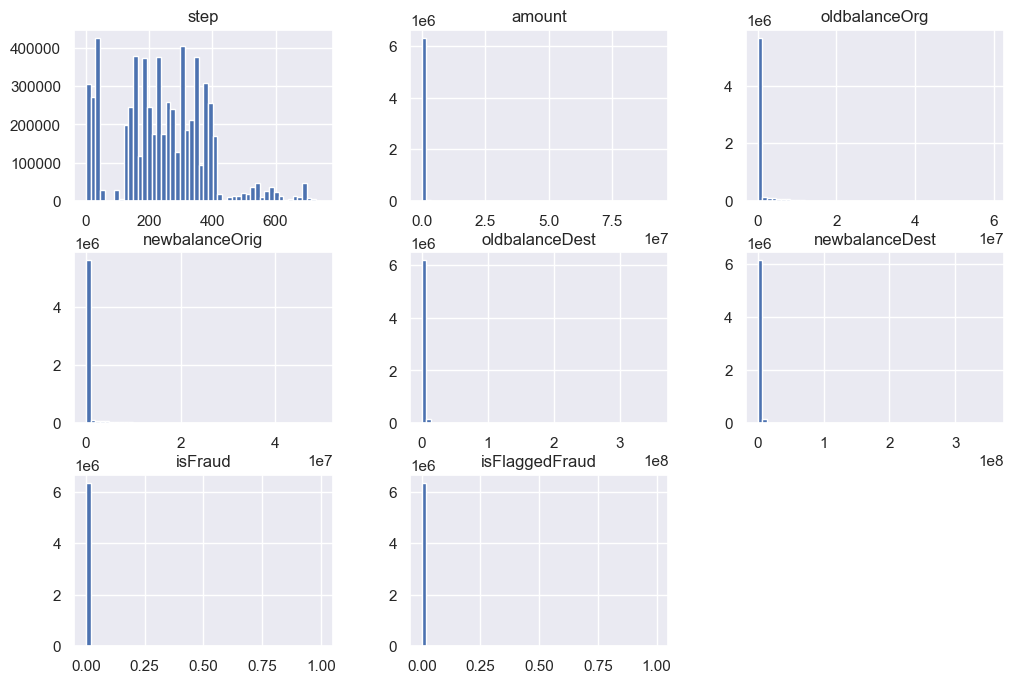

In [25]:
ax = df.hist(bins=50, figsize=(12, 8))
plt.yscale('log')
plt.show()

Após a primeira análise podemos ver que, apenas a feature `steps` poderá ser visualizado por meio de um histograma. Os demais poderão ser melhor visuazliados de outras maneiras, como BoxPlot, por exemplo

<Axes: xlabel='step', ylabel='Count'>

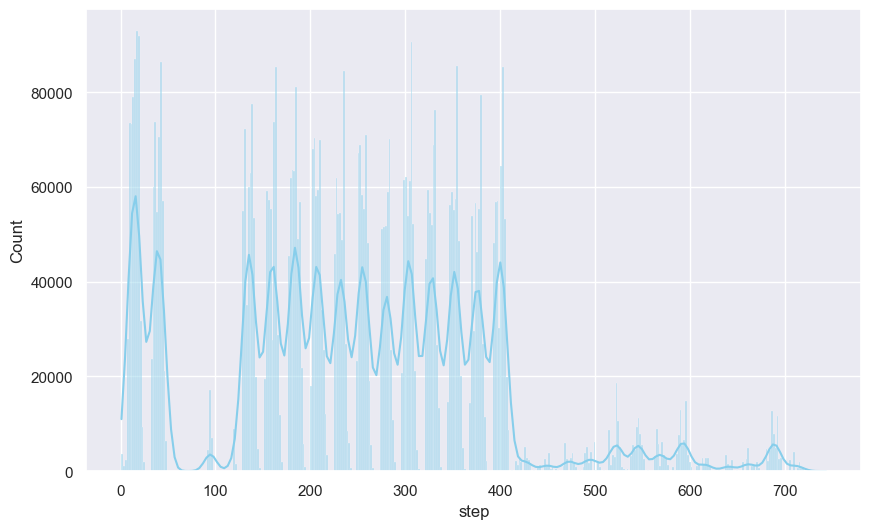

In [27]:
sns.histplot(data=df, x="step", kde=True, color = 'skyblue')

<Axes: >

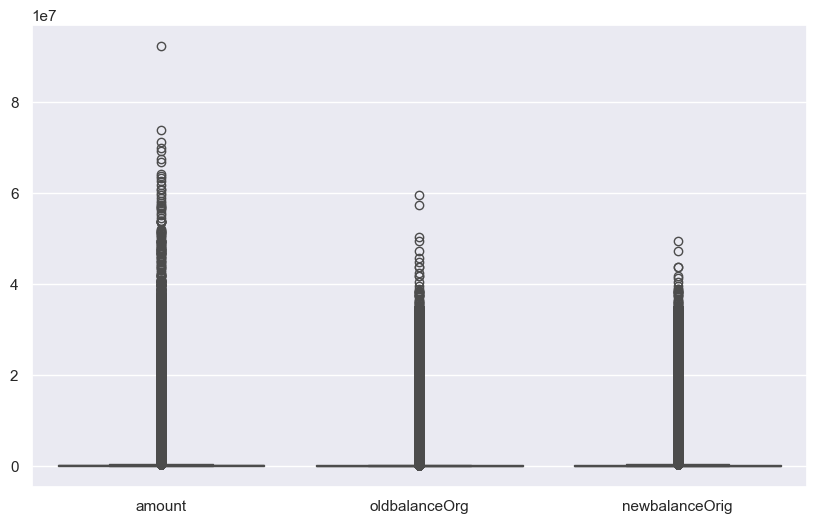

In [28]:
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig']],color = 'skyblue', showfliers=True)

<Axes: >

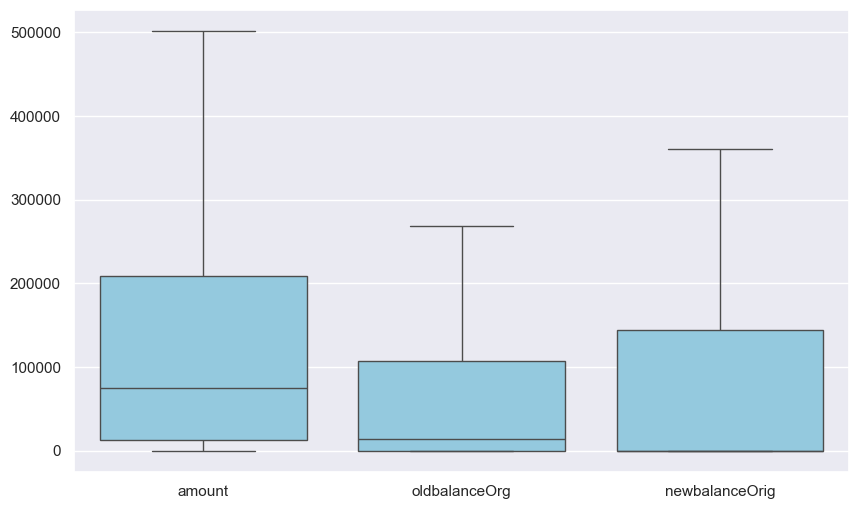

In [29]:
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig']],color = 'skyblue', showfliers=False)

<Axes: >

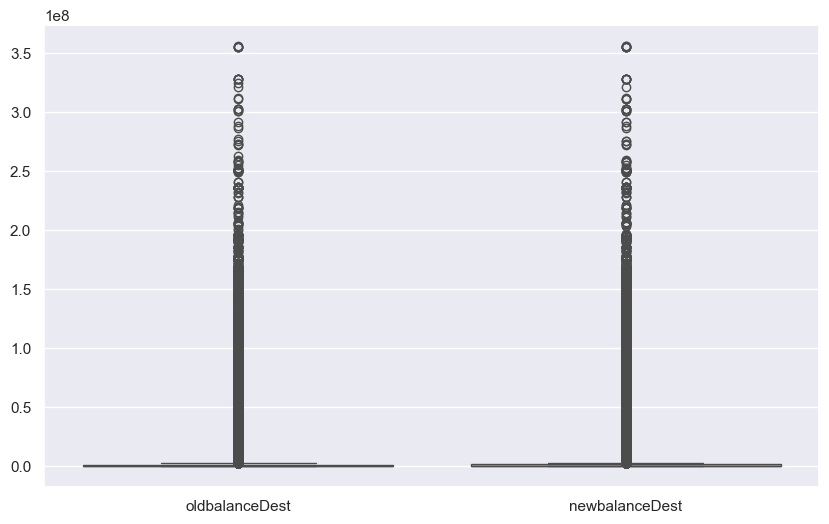

In [31]:
sns.boxplot(data=df[['oldbalanceDest', 'newbalanceDest']],color = 'skyblue', showfliers=True)

<Axes: >

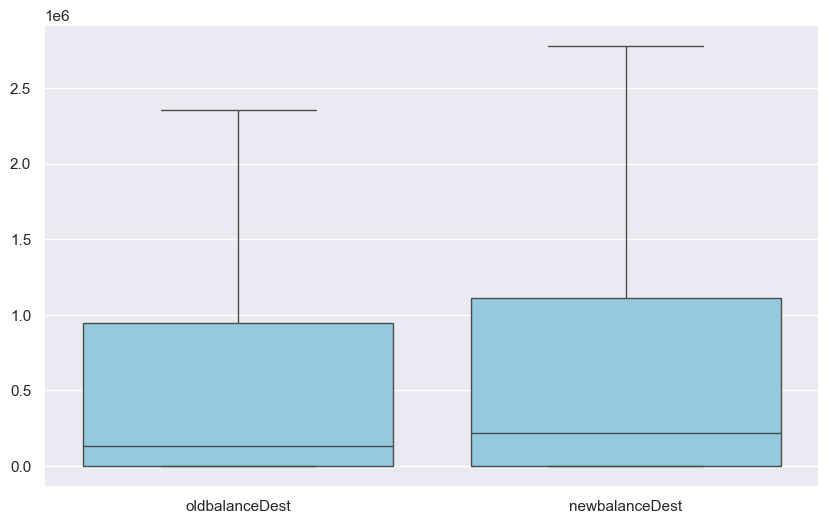

In [32]:
sns.boxplot(data=df[['oldbalanceDest', 'newbalanceDest']],color = 'skyblue', showfliers=False)

Analise sobreo que vemos

### Categorical Features

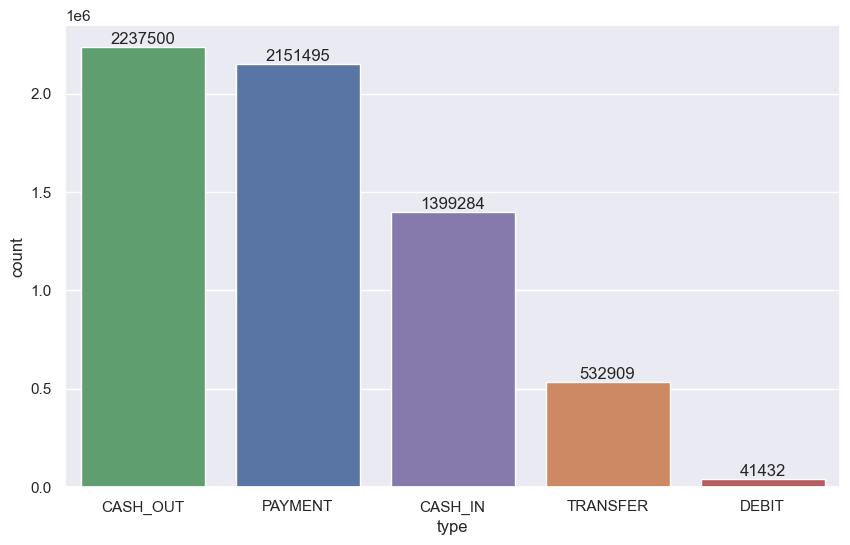

In [45]:
ax = sns.countplot(df, x="type", order=df['type'].value_counts().index, hue = 'type')#, color = 'skyblue')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.show()

In [46]:
categorical_features

['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']

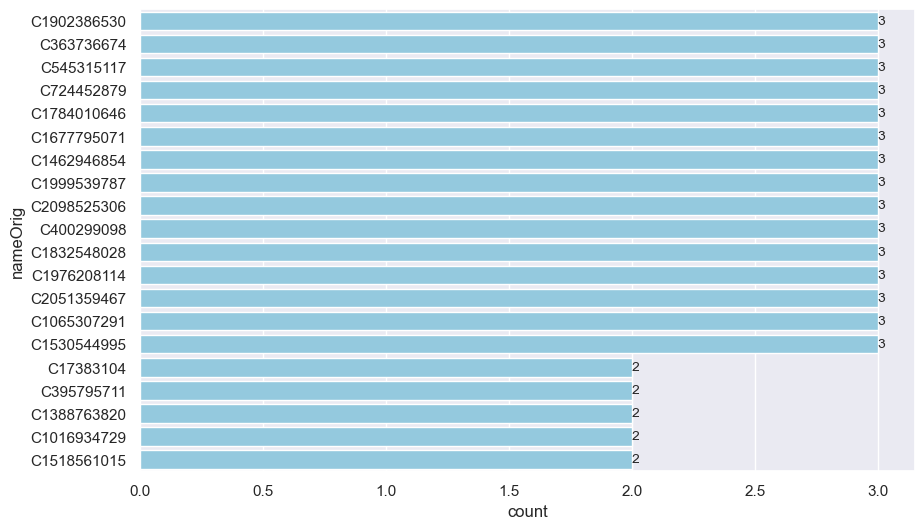

In [47]:
# top 20 nameorg + repetido

ax = sns.countplot(df, y="nameOrig", order=df['nameOrig'].value_counts().index[:20], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

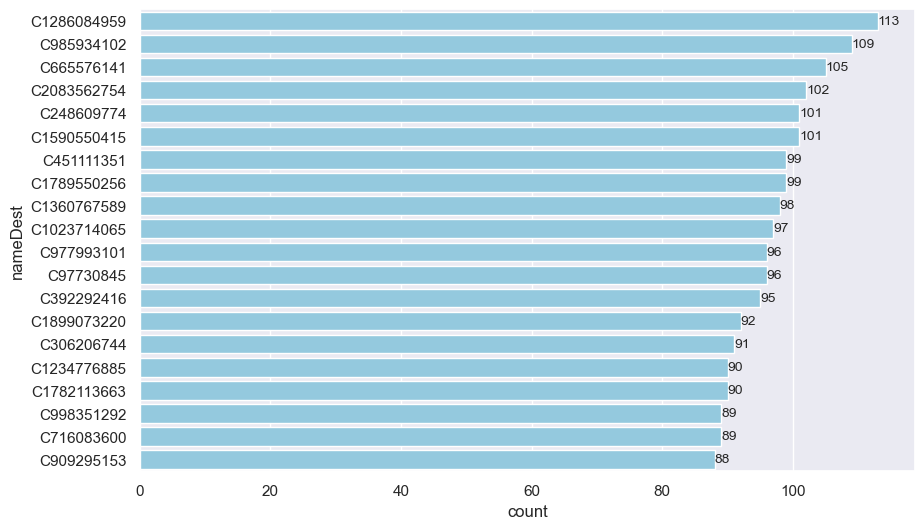

In [48]:
# top 20 namedest + repetido

ax = sns.countplot(df, y="nameDest", order=df['nameDest'].value_counts().index[:20], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

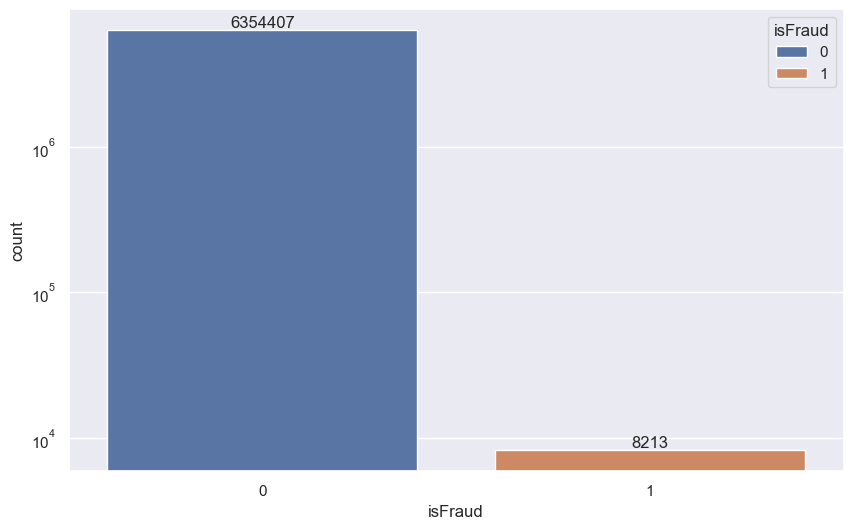

In [49]:
# pie chart e barplot de isFraud

ax = sns.countplot(df, x="isFraud", hue = 'isFraud')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.yscale('log')
plt.show()

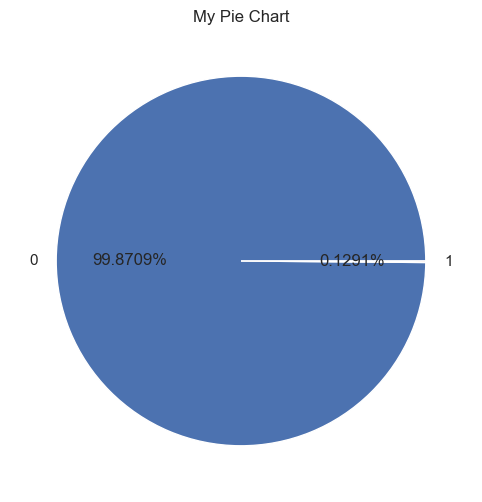

In [50]:
plt.pie(x = df['isFraud'].value_counts(), labels = df['isFraud'].value_counts().index, autopct='%1.4f%%')
plt.title('My Pie Chart')
plt.show()

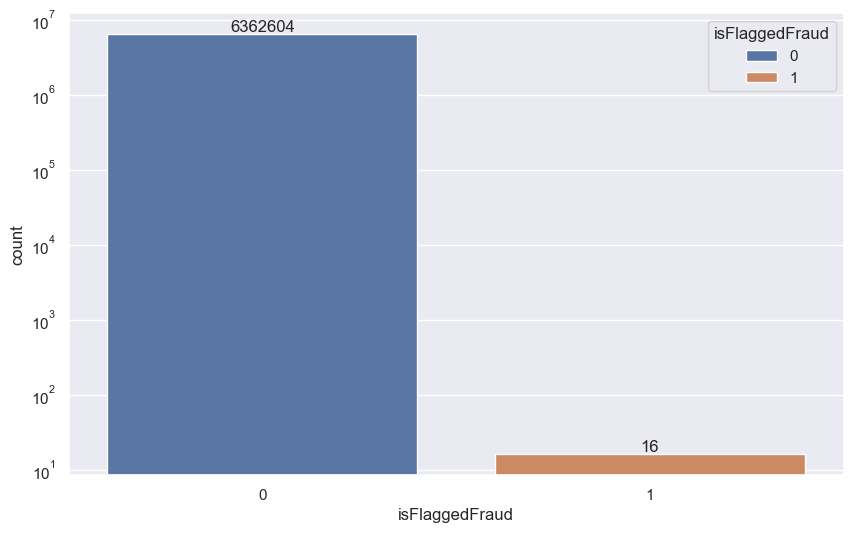

In [52]:
# pie chart e barplot de isFlaggedFraud
ax = sns.countplot(df, x="isFlaggedFraud", hue = 'isFlaggedFraud')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.yscale('log')
plt.show()

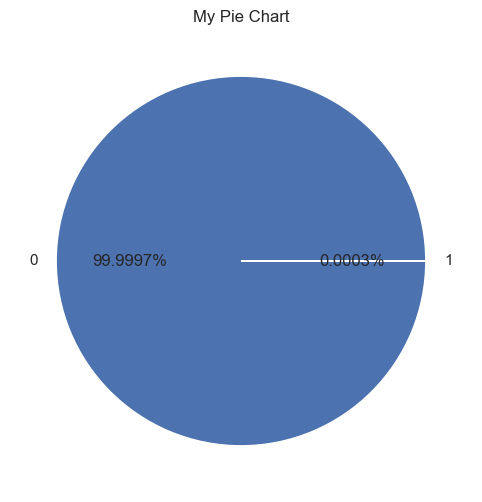

In [53]:
plt.pie(x = df['isFlaggedFraud'].value_counts(), labels = df['isFlaggedFraud'].value_counts().index, autopct='%1.4f%%')
plt.title('My Pie Chart')
plt.show()

## Fraud Analysis (ajustar esse gráfico e plotar toods so gráficos com o padrão da fraude pra ver como fica.)

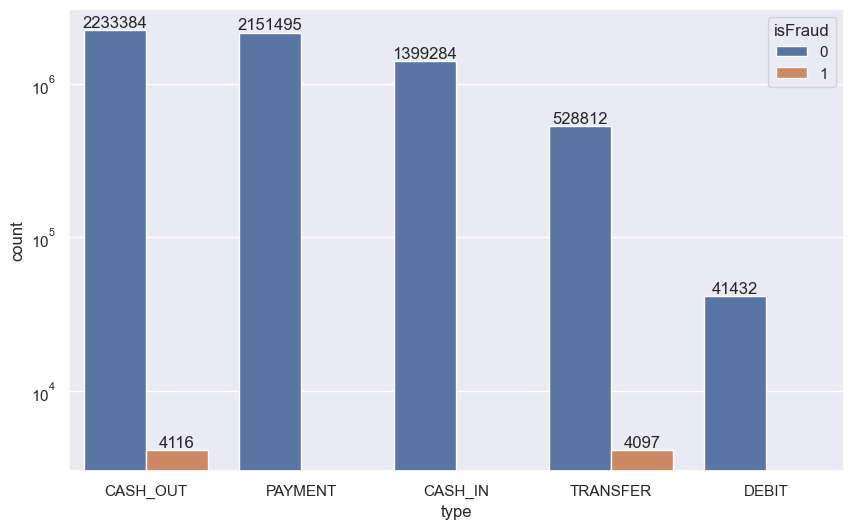

In [58]:
ax = sns.countplot(df, x="type", order=df['type'].value_counts().index, hue = 'isFraud')

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

plt.yscale('log')
plt.show()

Observamos que em apenas dois tipos de transição houveram fraudes: `CASH_OUT` e `TRANSFER`. Vamos tentar observar isso mais de perto

In [151]:
df_fraud_type = df[df['type'].isin(['CASH_OUT','TRANSFER'])].groupby(['type','isFraud']).agg(
    amount_sum = ('amount', 'sum'), 
    count_fraud = ('isFraud', 'count')
)

df_fraud_type = df_fraud_type.reset_index()
df_fraud_type

,type,isFraud,amount_sum,count_fraud
0,CASH_OUT,0,3.884238e+11,2233384
1,CASH_OUT,1,5.989202e+09,4116
2,TRANSFER,0,4.792248e+11,528812
3,TRANSFER,1,6.067213e+09,4097


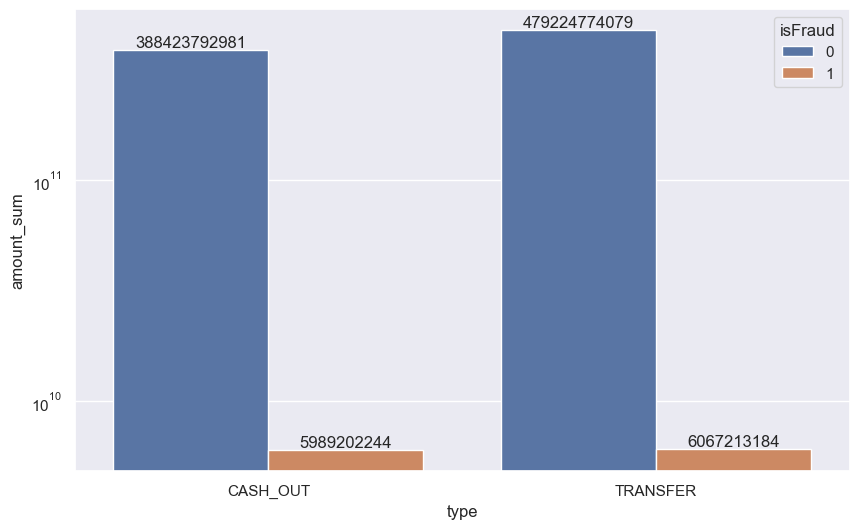

In [135]:
ax = sns.barplot(data = df_fraud_type, x="type", y = "amount_sum", order = df_fraud_type['type'], hue = 'isFraud')

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

plt.yscale('log')
plt.show()

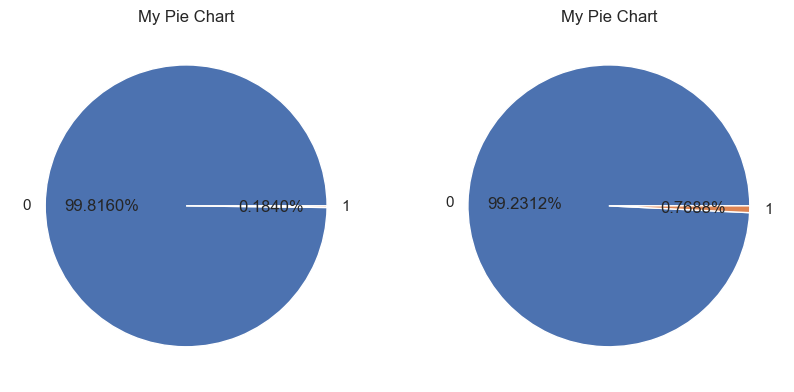

In [207]:
ig, (ax1, ax2) = plt.subplots(1, 2)


DATA_TEST2 = df[df['type'].isin(['CASH_OUT'])]

ax1.pie(data = DATA_TEST2, 
        x = DATA_TEST2['isFraud'].value_counts(), 
        labels = DATA_TEST2['isFraud'].value_counts().index, 
        autopct='%1.4f%%'
       )



ax1.set_title('My Pie Chart')


DATA_TEST = df[df['type'].isin(['TRANSFER'])]

ax2.pie(data = DATA_TEST, 
        x = DATA_TEST['isFraud'].value_counts(), 
        labels = DATA_TEST['isFraud'].value_counts().index, 
        autopct='%1.4f%%'
       )
ax2.set_title('My Pie Chart')


plt.show()

In [2]:
# Plota boxplot dos valores de cashout e transfer que são e não são fraude em termos de valor

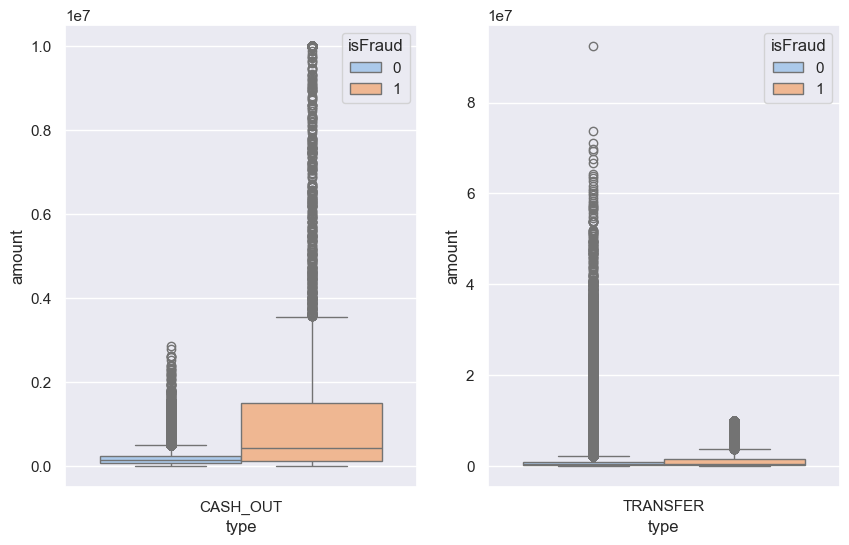

In [153]:
f, axes = plt.subplots(1, 2)

sns.boxplot(data=df[df['type'].isin(['CASH_OUT'])], 
            y="amount", x="type", hue="isFraud", palette="pastel", 
            showfliers=True, ax=axes[0])
sns.boxplot(data=df[df['type'].isin(['TRANSFER'])], 
            y="amount", x="type", hue="isFraud", palette="pastel", 
            showfliers=True, ax=axes[1])
plt.show()

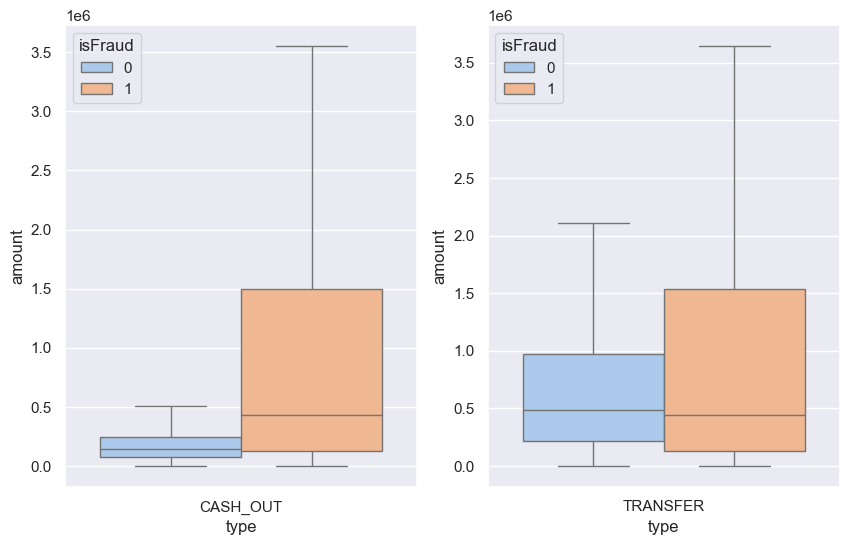

In [155]:
f, axes = plt.subplots(1, 2)

sns.boxplot(data=df[df['type'].isin(['CASH_OUT'])], 
            y="amount", x="type", hue="isFraud", palette="pastel", 
            showfliers=False, ax=axes[0])
sns.boxplot(data=df[df['type'].isin(['TRANSFER'])], 
            y="amount", x="type", hue="isFraud", palette="pastel", 
            showfliers=False, ax=axes[1])
plt.show()

## Feature Engeneering

Um novo parametro que é possível considerar é a diferença que se tem em cada transição `old` e `new`:

In [139]:
numerical_features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [ ]:
df['balanceOrigDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

## Correlations

A última etapa antes da aplicação de modelos será observar as correlações entre as features e a possbilidade de fraude